In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix


from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('Train.csv')
print(df.shape)
df.head()

(23856, 18)


,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [3]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [5]:
df['MULTIPLE_OFFENSE'].value_counts(normalize=True)

1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

In [6]:
pd.isnull(df).sum(axis=0)

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [7]:
#Filling the NAs in X_12 feature
df['X_12'] = df['X_12'].interpolate(method='linear')

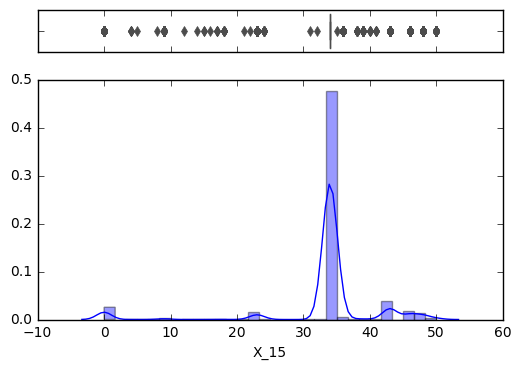

In [8]:
#Check the outlier
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df['X_15'], ax=ax_box)
sns.distplot(df['X_15'], ax=ax_hist,bins=30)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


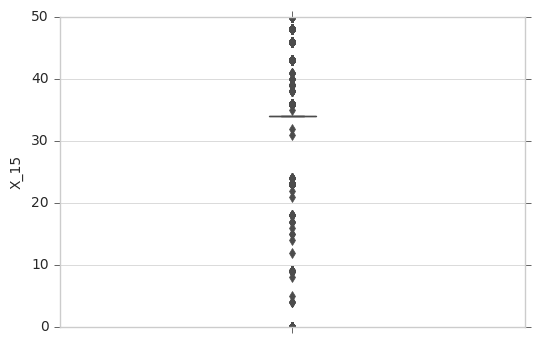

In [9]:
#df.plot(y=df['X_12'],kind='box')

sns.set_style('whitegrid')
sns.boxplot(y=df['X_15'],width=0.1)


In [10]:
#Checking the outlier in features
features = ['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']

for i in features:
    z_scores = (np.abs(stats.zscore(df[i])))
    #z_scores[z_scores > 3]
    print(i,(z_scores > 3).any())

#zs = np.abs(stats.zscore(df['X_7']))
#zs[zs > 3]

X_1 True
X_2 False
X_3 False
X_4 False
X_5 False
X_6 False
X_7 True
X_8 True
X_9 True
X_10 True
X_11 False
X_12 True
X_13 True
X_14 False
X_15 True


In [11]:
#Another way to check the outlier in variable
df.skew()

X_1                  3.789307
X_2                 -0.094752
X_3                 -0.082120
X_4                  0.183393
X_5                  0.175231
X_6                  0.960829
X_7                  0.796168
X_8                 17.703849
X_9                 -1.525287
X_10                34.942713
X_11                -0.903200
X_12                30.658112
X_13                -1.388637
X_14                 0.245588
X_15                -2.527454
MULTIPLE_OFFENSE    -4.402997
dtype: float64

In [12]:
#Based on the skewness treat the outlier
features = ['X_1','X_7','X_8','X_9','X_10','X_12','X_13','X_15']
for i in features:
    ten_percentile = df[i].quantile(0.10)
    ninty_percentile = df[i].quantile(0.90)
    
    df[i] = np.where(df[i] <ten_percentile, ten_percentile,df[i])
    df[i] = np.where(df[i] >ninty_percentile, ninty_percentile,df[i])

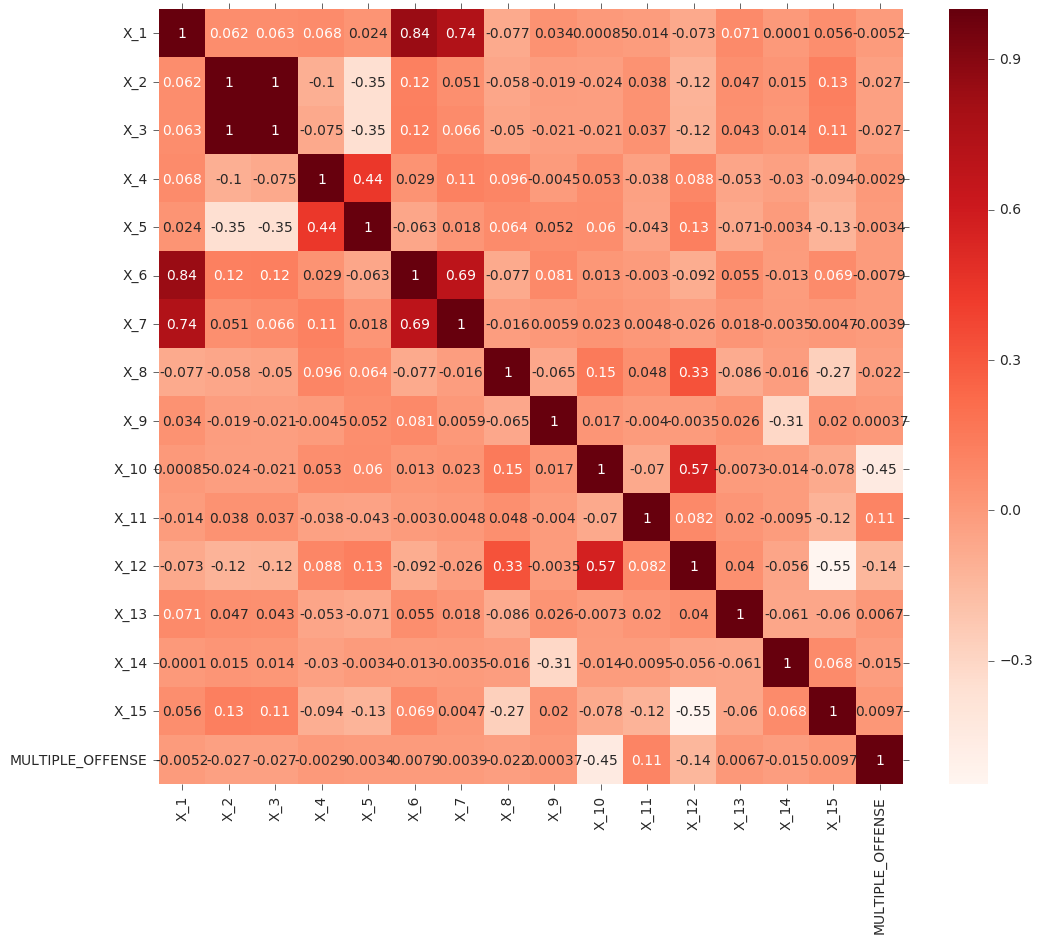

In [13]:
#Correlation matrix
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
X = df.iloc[:,2:-1]  #independent columns
y = df.iloc[:,17]    #target column

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScores.sort_values(by='Score',ascending=False)

   Specs         Score
10  X_11  11017.611286
9   X_10    542.893430
11  X_12    173.375608
1    X_2    166.484588
2    X_3    164.308071
13  X_14    143.417298
7    X_8      7.333043
12  X_13      6.990472
5    X_6      4.841162
6    X_7      0.887546


,Specs,Score
10,X_11,11017.611286
9,X_10,542.893430
11,X_12,173.375608
1,X_2,166.484588
2,X_3,164.308071
13,X_14,143.417298
7,X_8,7.333043
12,X_13,6.990472
5,X_6,4.841162
6,X_7,0.887546


F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00573081 0.0287037  0.02980287 0.01741488 0.0156569  0.03247802
 0.02587058 0.01826825 0.02131558 0.25178356 0.20851323 0.14555849
 0.03879473 0.04262234 0.11748606]


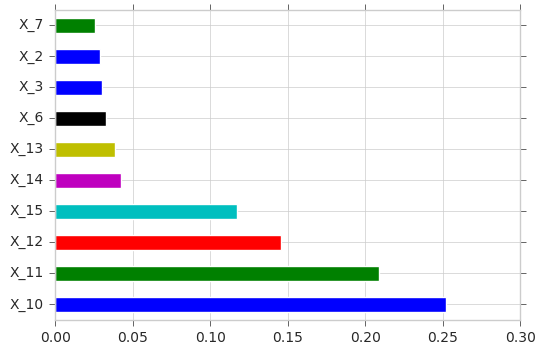

In [15]:
#For selecting the related features only
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [16]:
#Based on above two method only below set of features are selected to be trained for ML model
X = df[['X_2','X_3','X_10','X_11','X_12','X_14','X_15']].values
y = df.iloc[:,17].values

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.33, random_state=42, stratify=y)

print("The length of X_train is ", X_train.shape)
print("The length of y_train is ", y_train.shape)
print("The length of X_test is ", X_test.shape)
print("The length of y_test is ", y_test.shape)

######Data Standardization###########
#Standardization refers to shifting the distribution of each attribute to have a mean of zero and 
#a standard deviation of one (unit variance).
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##Min-Max Scaler
#mm_scaler = preprocessing.MinMaxScaler()
#X_train = mm_scaler.fit_transform(X_train)
#mm_scaler.fit_transform(X_test)

########Data Normalization
#Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
#It is useful to scale the input attributes for a model that relies on the magnitude of values, 
#such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.

# normalize the data attributes
#normalized_X = preprocessing.normalize(X)

#X_train, X_test, y_train, y_test = train_test_split(normalized_X,y , test_size=0.3, random_state=21)

#print (X_train.shape, y_train.shape)
#print (X_test.shape, y_test.shape)

The length of X_train is  (15983, 7)
The length of y_train is  (15983,)
The length of X_test is  (7873, 7)
The length of y_test is  (7873,)


In [17]:
#Let’s build and evaluate our five models:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.993054 (0.002313)
LDA: 0.964946 (0.003443)
KNN: 0.996260 (0.001821)
CART: 0.998556 (0.000824)
NB: 0.890478 (0.007210)
SVM: 0.998032 (0.001064)


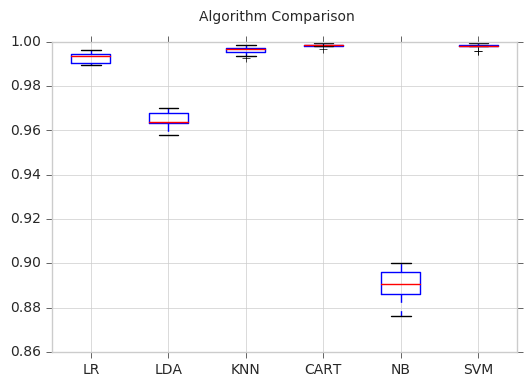

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
#KNN alogorithm selected
#K=3 selected based on below graph of training and testing accuracy
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall Score : ',recall_score(y_test, y_pred))
print('--------------------------------')
print('Recall Score of training: ',recall_score(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


[[ 266   86]
 [  33 7488]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       352
           1       0.99      1.00      0.99      7521

   micro avg       0.98      0.98      0.98      7873
   macro avg       0.94      0.88      0.90      7873
weighted avg       0.98      0.98      0.98      7873

Recall Score :  0.9956122856003191
--------------------------------
Recall Score of training:  0.9977729743892054
[[  608   108]
 [   34 15233]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       716
           1       0.99      1.00      1.00     15267

   micro avg       0.99      0.99      0.99     15983
   macro avg       0.97      0.92      0.95     15983
weighted avg       0.99      0.99      0.99     15983



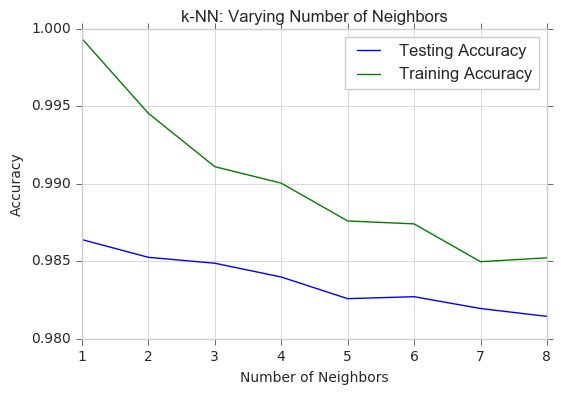

In [20]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
df_test = pd.read_csv('Test.csv')
print(df_test.shape)
df_test.head()

(15903, 17)


,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [22]:
df_test.info()
pd.isnull(df_test).sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
INCIDENT_ID    15903 non-null object
DATE           15903 non-null object
X_1            15903 non-null int64
X_2            15903 non-null int64
X_3            15903 non-null int64
X_4            15903 non-null int64
X_5            15903 non-null int64
X_6            15903 non-null int64
X_7            15903 non-null int64
X_8            15903 non-null int64
X_9            15903 non-null int64
X_10           15903 non-null int64
X_11           15903 non-null int64
X_12           15776 non-null float64
X_13           15903 non-null int64
X_14           15903 non-null int64
X_15           15903 non-null int64
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [29]:
#Filling the NAs in X_12 feature
df_test['X_12'] = df_test['X_12'].interpolate(method='linear')
#After removing the NAs there is one more record remain 
#i.e. the first record whose value was not filled using the linear(interpolate) method
#so replace the first record with mode of column


df_test['X_12'].fillna(df_test['X_12'].mode()[0], inplace=True)
df_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,1.0,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [30]:
#Checking the outlier in features
features = ['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']

for i in features:
    z_scores = (np.abs(stats.zscore(df_test[i])))
    #z_scores[z_scores > 3]
    print(i,(z_scores > 3).any())


X_1 True
X_2 False
X_3 False
X_4 False
X_5 False
X_6 False
X_7 True
X_8 True
X_9 True
X_10 True
X_11 False
X_12 True
X_13 True
X_14 False
X_15 True


In [32]:
df_test.skew()

X_1      3.855872
X_2     -0.091353
X_3     -0.079035
X_4      0.192480
X_5      0.173068
X_6      0.985032
X_7      0.802806
X_8      9.687115
X_9     -1.506788
X_10    13.274882
X_11    -0.903160
X_12     9.050323
X_13    -1.412508
X_14     0.264785
X_15    -2.570693
dtype: float64

In [33]:
#Based on the skewness treat the outlier
features = ['X_1','X_7','X_8','X_9','X_10','X_12','X_13','X_15']
for i in features:
    ten_percentile = df_test[i].quantile(0.10)
    ninty_percentile = df_test[i].quantile(0.90)
    
    df_test[i] = np.where(df_test[i] <ten_percentile, ten_percentile,df_test[i])
    df_test[i] = np.where(df_test[i] >ninty_percentile, ninty_percentile,df_test[i])

In [34]:
df_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0.0,30,35,7,3,6,4.0,0.0,5.0,1.0,174,1.0,72.0,119,34.0
1,CR_103520,05-MAR-04,0.0,44,44,1,3,7,1.0,2.0,6.0,1.0,316,0.0,34.0,29,34.0
2,CR_196089,27-JAN-18,0.0,34,33,3,5,2,7.0,2.0,2.0,1.0,316,1.0,72.0,0,34.0
3,CR_112195,18-AUG-06,1.0,3,2,3,5,9,8.0,0.0,5.0,1.0,174,1.0,112.0,87,34.0
4,CR_149832,31-OCT-11,0.0,7,8,7,3,2,7.0,1.0,5.0,1.0,174,0.0,112.0,93,43.0


In [35]:
#Applying ML algo

X_train = df[['X_2','X_3','X_10','X_11','X_12','X_14','X_15']].values
Y_train = df['MULTIPLE_OFFENSE'].values
X_test  = df_test[['X_2','X_3','X_10','X_11','X_12','X_14','X_15']].values
X_train.shape, Y_train.shape, X_test.shape

((23856, 7), (23856,), (15903, 7))

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

y_prediction_unseen = classifier.predict(X_test)


In [37]:
submission = pd.DataFrame({
        "INCIDENT_ID": df_test['INCIDENT_ID'],
        "MULTIPLE_OFFENSE": y_prediction_unseen
    })

submission.to_csv('Final_submission.csv', index=False)

In [38]:
y_prediction_unseen.shape

(15903,)